In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
% matplotlib inline 

***The dataset is loaded and viewed.***

In [31]:
df1=pd.read_csv('2017-fordgobike-tripdata.csv')

In [32]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,45:48.4,28:36.9,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,31:10.6,47:23.5,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


***The summary of data frame is printed***

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


***Null values in dataframe are dropped***

In [34]:
df2=df1.dropna(axis=0)
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
4,43603,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female
6,4507,49:28.4,04:35.6,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female
12,2183,52:55.6,29:18.7,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male


***Changing member_birth_year from float to int***

In [36]:
df2['member_birth_year']=df2['member_birth_year'].astype(int)

C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df2['member_birth_year'].unique()

array([1987, 1965, 1997, 1991, 1990, 1980, 1979, 1988, 1971, 1992, 1985,
       1978, 1993, 1977, 1984, 1983, 1967, 1994, 1974, 1968, 1962, 1989,
       1986, 1964, 1950, 1958, 1976, 1982, 1981, 1966, 1995, 1957, 1996,
       1954, 1970, 1961, 1900, 1975, 1953, 1960, 1973, 1969, 1963, 1943,
       1959, 1999, 1998, 1955, 1947, 1951, 1972, 1956, 1948, 1952, 1949,
       1945, 1944, 1941, 1902, 1938, 1946, 1933, 1935, 1924, 1928, 1934,
       1940, 1911, 1942, 1907, 1939, 1901, 1886], dtype=int64)

***Age is calculated by subtracting member_birth_year from 2017 and is added to the dataframe.***

In [38]:
df2['age']=2017-df2['member_birth_year']
df2.head()

C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age
0,80110,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,30
1,78800,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,52
4,43603,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,20
6,4507,49:28.4,04:35.6,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,26
12,2183,52:55.6,29:18.7,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,27


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null int32
member_gender              453159 non-null object
age                        453159 non-null int32
dtypes: float64(4), int32(2), int64(4), object(6)
memory usage: 55.3+ MB


***The unique ages from dataframe are listed***

In [40]:
df2['age'].unique()

array([ 30,  52,  20,  26,  27,  37,  38,  29,  46,  25,  32,  39,  24,
        40,  33,  34,  50,  23,  43,  49,  55,  28,  31,  53,  67,  59,
        41,  35,  36,  51,  22,  60,  21,  63,  47,  56, 117,  42,  64,
        57,  44,  48,  54,  74,  58,  18,  19,  62,  70,  66,  45,  61,
        69,  65,  68,  72,  73,  76, 115,  79,  71,  84,  82,  93,  89,
        83,  77, 106,  75, 110,  78, 116, 131], dtype=int64)

***Since the longest number of years lived by a human is 122, the data where age is 131 is removed.***

In [41]:
df2[df2['age']==131]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age
425817,2546,47:32.1,29:58.8,197,El Embarcadero at Grand Ave,37.808848,-122.24968,172,College Ave at Taft Ave,37.841800,-122.251535,1448,Customer,1886,Male,131
426608,1767,20:02.2,49:29.7,235,Union St at 10th St,37.807239,-122.28937,197,El Embarcadero at Grand Ave,37.808848,-122.249680,91,Customer,1886,Male,131


In [42]:
df2=df2.drop(index=425817,axis=0)

In [43]:
df2=df2.drop(index=426608,axis=0)

In [44]:
df2.loc[425816:426609,:]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age
425816,600,19:59.1,30:00.0,327,5th St at San Salvador St,37.332039,-121.881766,312,San Jose Diridon Station,37.329732,-121.901782,2105,Subscriber,1987,Female,30
425819,421,21:25.7,28:27.2,321,5th at Folsom,37.780146,-122.403071,66,3rd St at Townsend St,37.778742,-122.392741,1388,Subscriber,1965,Female,52
425820,407,21:39.1,28:26.2,321,5th at Folsom,37.780146,-122.403071,66,3rd St at Townsend St,37.778742,-122.392741,1980,Subscriber,1971,Male,46
425821,235,24:21.7,28:17.3,180,Telegraph Ave at 23rd St,37.812678,-122.268773,182,19th Street BART Station,37.809013,-122.268247,865,Subscriber,1983,Male,34
425822,894,13:19.7,28:13.9,98,Valencia St at 16th St,37.765052,-122.421866,96,Dolores St at 15th St,37.766210,-122.426614,1628,Customer,1991,Female,26
425823,893,13:03.0,27:56.8,98,Valencia St at 16th St,37.765052,-122.421866,96,Dolores St at 15th St,37.766210,-122.426614,2029,Customer,1991,Male,26
425824,1430,02:33.2,26:23.3,126,Esprit Park,37.761634,-122.390648,323,Broadway at Kearny,37.798014,-122.405950,1768,Customer,1960,Male,57
425825,669,14:57.3,26:06.3,185,Jackson St at 14th St,37.801858,-122.265368,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,1061,Subscriber,1989,Male,28
425826,516,17:13.7,25:49.8,230,14th St at Mandela Pkwy,37.810743,-122.291415,230,14th St at Mandela Pkwy,37.810743,-122.291415,693,Customer,1984,Male,33
425827,1027,08:23.6,25:31.0,70,Central Ave at Fell St,37.773311,-122.444293,77,11th St at Natoma St,37.773507,-122.416040,205,Subscriber,1969,Male,48


***The age_group is segregatted as young,middleage,old.***

In [45]:
df2.loc[(df2['age']>30) & (df2['age']<=50),'age_group']='middleage'
df2.loc[df2['age']>50,'age_group']='old'
df2.loc[df2['age']<=30,'age_group']='young'

In [46]:
df2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age,age_group
0,80110,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,30,young
1,78800,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,52,old
4,43603,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,20,young
6,4507,49:28.4,04:35.6,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,26,young
12,2183,52:55.6,29:18.7,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,27,young
13,2170,52:55.9,29:06.9,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,1990,Male,27,young
15,1544,53:38.9,19:23.0,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,1980,Female,37,middleage
16,1474,54:40.1,19:14.4,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,1979,Male,38,middleage
18,1532,52:49.5,18:22.0,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,1988,Other,29,young
19,1216,46:34.0,06:50.1,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,1971,Male,46,middleage


***Two groups are segregated where the start stations and end stations are same and start station and end stations are not the same.*** 

In [48]:
df2['start=end']=np.where(df2['start_station_id']==df2['end_station_id'],'True','False')
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,age,age_group,start=end
0,80110,57:39.7,12:50.2,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,30,young,False
1,78800,56:34.8,49:55.6,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,52,old,False
4,43603,23:14.0,29:57.6,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,20,young,False
6,4507,49:28.4,04:35.6,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,26,young,True
12,2183,52:55.6,29:18.7,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,27,young,False


**EXPLORATORY ANALYSIS**

***The frequency of start station and end station being equal and not equal is first found out.Then the median duration of both are compared.The correlation of the variable with other variables are also found out.The frequency of all the categorical variables like age group,gender,user type and the inter correlations are observed.How these variables affect the duration is noted down.The quantitative correlation between age and duration is highlighted.***

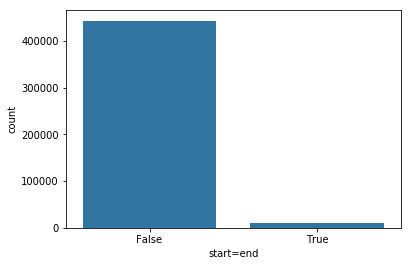

In [49]:
#Countplot is plotted to find the number of people who choose the same end station as the start station.
sb.countplot(data=df2,x='start=end',color=sb.color_palette()[0])

***It has been found that considerably a large number of people don't choose the same end station and start station***

([<matplotlib.axis.YTick at 0x1f0344679e8>,
 <a list of 34 Text yticklabel objects>)

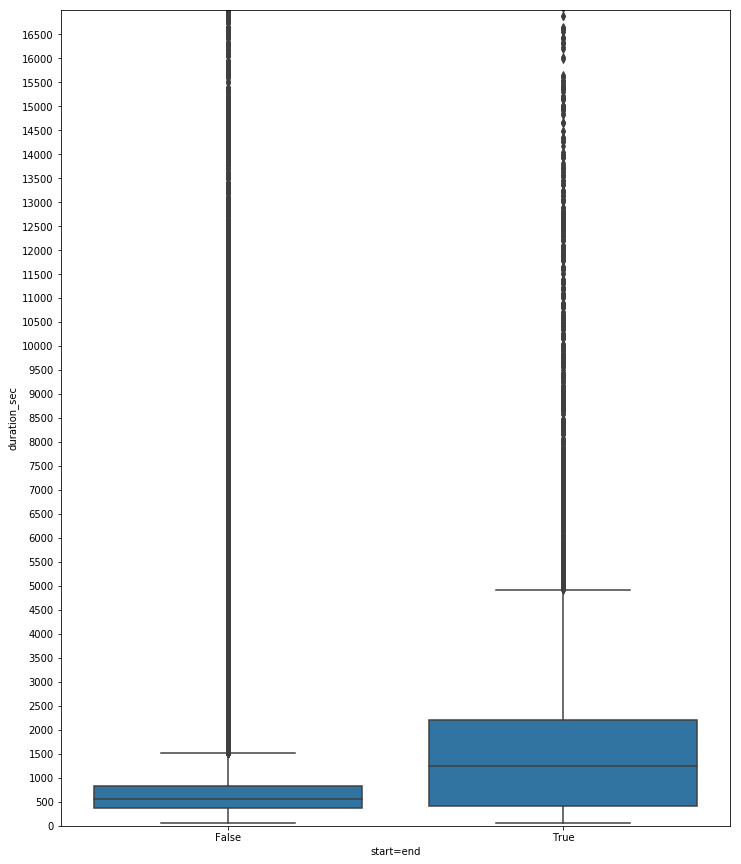

In [21]:
#Boxplot is used to find the average seconds taken by the customers who drop the bike 
#at the same station as where their start station was and for the ones who drop it in different station. 
plt.figure(figsize=[12,15])
base_color=sb.color_palette()[0]
sb.boxplot(data=df2,x='start=end',y='duration_sec',color=base_color);
plt.ylim(0,17000)
plt.yticks(np.arange(0,17000,500))

***Interestingly the median duration of users who drop the bike in same station is higher,also considering the outliers.***  

In [22]:
df2_startequal_end=df2[df2['start=end']=='True']
df2_startnotequal_end=df2[df2['start=end']=='False']

Text(0.5,1,'start not equal to end station')

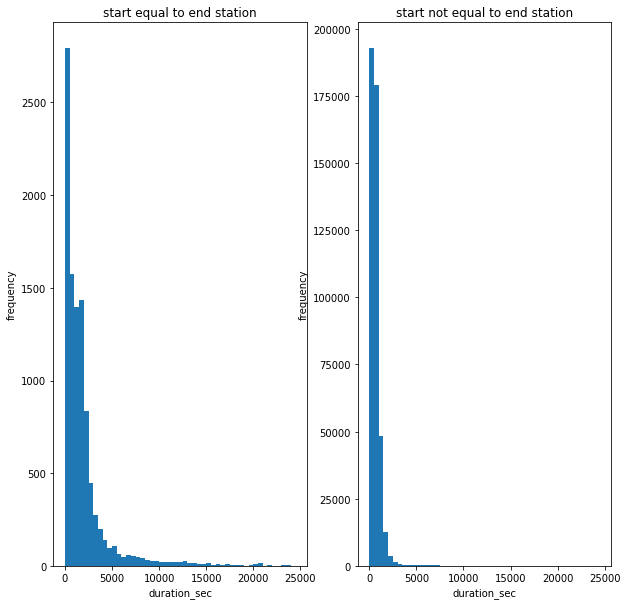

In [54]:
bin_edge=np.arange(0,25000,500)
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.hist(data=df2_startequal_end,x='duration_sec',bins=bin_edge)
plt.xlabel('duration_sec')
plt.ylabel('frequency')
plt.title('start equal to end station')
plt.subplot(1,2,2)
plt.hist(data=df2_startnotequal_end,x='duration_sec',bins=bin_edge)
plt.xlabel('duration_sec')
plt.ylabel('frequency')
plt.title('start not equal to end station')

***Right skewed plots imply that the mean is greater than the median.A similar pattern in the histograms also imply that whether the end and start station are same doesn't effect the correlation of frequency and duration much.***

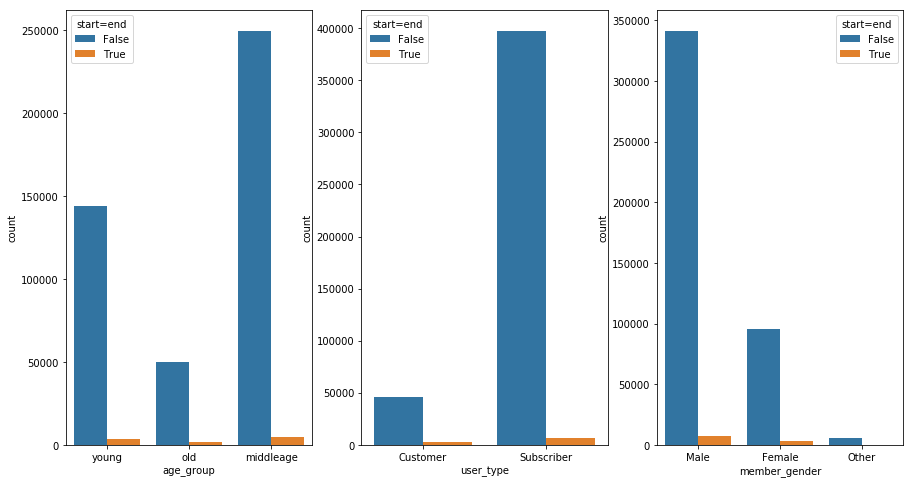

In [56]:
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sb.countplot(data=df2,x='age_group',hue='start=end')
plt.subplot(1,3,2)
sb.countplot(data=df2,x='user_type',hue='start=end')
plt.subplot(1,3,3)
sb.countplot(data=df2,x='member_gender',hue='start=end')

***Irrespective of the gender,age_group and user type, the start station being equal to end station clearly remains low.***

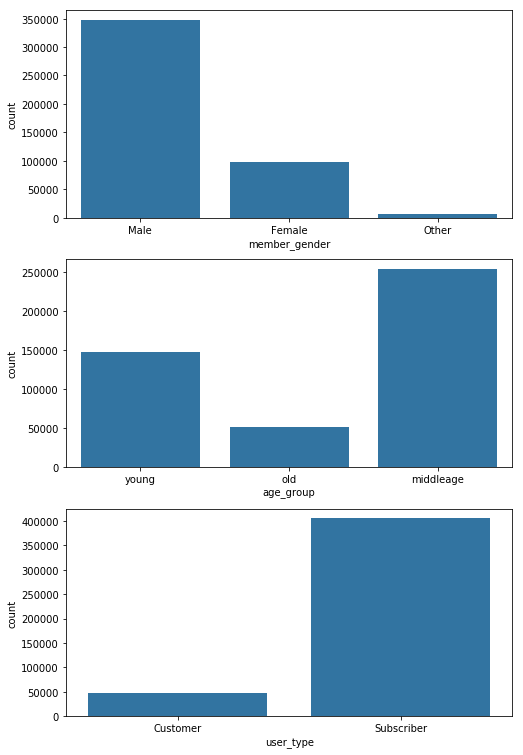

In [50]:
#The number of users based on gender,age_group and user_type are counted using countplot
fig, ax = plt.subplots(nrows=3,figsize = [8,13])
default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = df2, x = 'age_group', color = default_color, ax = ax[1])
sb.countplot(data = df2, x = 'user_type', color = default_color, ax = ax[2])


***It is observed that male users are much more than the other users.Number of middle age group users and subscribers are at the higher end than their counterparts.***

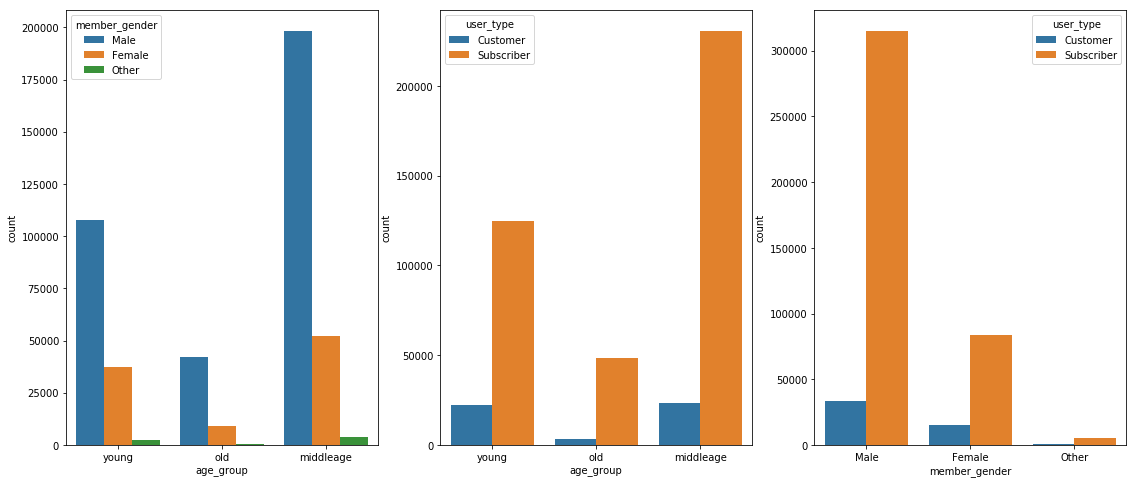

In [25]:
#Counting the number of people based on gender and age group.
plt.figure(figsize=[19,8])
plt.subplot(1,3,1)
sb.countplot(data=df2,x='age_group',hue='member_gender')
plt.subplot(1,3,2)
sb.countplot(data=df2,x='age_group',hue='user_type')
plt.subplot(1,3,3)
sb.countplot(data=df2,x='member_gender',hue='user_type')

***It is found that the users are mostly middleaged men who are subscribers***

(-50, 5000)

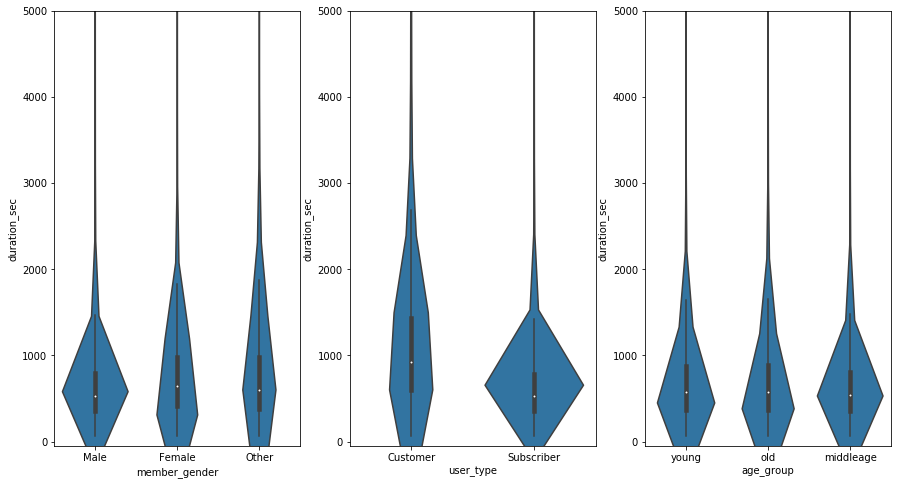

In [51]:
#violinplot is plotted to find the duration taken by different age group,user type and gender 
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
color_default=sb.color_palette()[0]
sb.violinplot(data=df2,x='member_gender',y='duration_sec',color=color_default)
plt.ylim(-50,5000)
plt.subplot(1,3,2)
sb.violinplot(data=df2,x='user_type',y='duration_sec',color=color_default)
plt.ylim(-50,5000)
plt.subplot(1,3,3)
sb.violinplot(data=df2,x='age_group',y='duration_sec',color=color_default)
plt.ylim(-50,5000)

***From the violin plots one can observe that the age_group and gender doesn't have much of an effect on the duration.It is interesting to note that the median duration taken by subscribers is much less than the customers.And also the probability density of subscribers and customers are high at around 800 sec. *** 

In [52]:
df2[df2['user_type']=='Subscriber'].duration_sec.mean()

705.57468894032

In [53]:
df2[df2['user_type']=='Customer'].duration_sec.mean()

1889.805552705559

Text(0,0.5,'duration_sec')

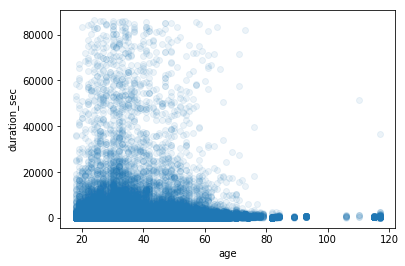

In [57]:
#scatter plot is plotted to find the correlation between duration and age
plt.scatter(data=df2,x='age',y='duration_sec',alpha=1/12)
plt.xlabel('age')
plt.ylabel('duration_sec')

***From the plot one can observe that after the age of 65 duration decreases with age and overall there is a negative correlation between both the variables***   

Text(0,0.5,'duration_sec')

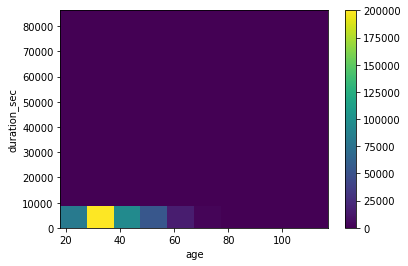

In [58]:
#A heatmap is plotted to further identify the correlation between age and duration  
plt.hist2d(data=df2,x='age',y='duration_sec')
plt.colorbar()
plt.xlabel('age')
plt.ylabel('duration_sec')

***It is found that users from age 30-38 correlated to the duration taken have highest density.***

**Interpertations:**

Most of the users are male in gender,middleaged in age group and subscribers in user type.Overall it has been found that a large section of users are middle-aged men who are subscribers followed by young men who are subscribers. Though the number of subscribers are more the median duration taken by subscribers are less than the customers.Most of the users don't drop the bikes at the same station as to where they start irrespective of their gender, user type and age group. Meanwhile the median and mean duration of users whose end station and start station are same is higher than the duration of users where both the stations are not the same. This can be attributed to the presence of many outliers. There is no correlation between the frequency and duration taken when it come to where the bike is dropped. Age and duration taken has a negative correlation and most of the users are particularly between the age of 30-38 who take within 10000 secs.
